In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

### Importing the data

In [2]:
data = pd.read_csv('football_deaths.csv')
data.head()

,row_id,incident_date,player_name,player_country,team_country,player_age,player_team_name,incident_description,heart_related,cardiac_related,collapsed,lightning,collision
0,1,1889-01-13,William Cropper,England,England,26.0,Staveley,Ruptured bowel in a match against Grimsby Town...,0,0,0,0,0
1,2,1892-01-11,James Dunlop,Scotland,Scotland,21.0,St Mirren,Tetanus from fall on piece of glass in a frien...,0,0,0,0,0
2,3,1893-11-12,John Henry Morris,England,England,26.0,Shrewsbury Town,Internal haemorrhage following a bad tackle in...,0,0,0,0,0
3,4,1893-11-23,Walter Bannister,England,England,24.0,Chesterfield Town,Rupture of the kidney from a tackle in game ag...,0,0,0,0,0
4,5,1896-03-28,Teddy Smith,England,England,27.0,Bedminster,Suffered severe concussion following a clash o...,0,0,0,0,0


## Data Cleaning

In [3]:
data['incident_date'] = pd.to_datetime(data['incident_date'])

### search for nan values

In [4]:
data.isna().sum()

row_id                   0
incident_date            0
player_name              0
player_country           0
team_country             2
player_age              15
player_team_name         0
incident_description     0
heart_related            0
cardiac_related          0
collapsed                0
lightning                0
collision                0
dtype: int64

### replace nan value of player age by its mean

In [5]:
data['player_age'].fillna(int(np.round(data['player_age'].mean(skipna=True))), inplace=True)

### drop nan value

In [6]:
data = data.dropna()

In [7]:
data.isna().sum()

row_id                  0
incident_date           0
player_name             0
player_country          0
team_country            0
player_age              0
player_team_name        0
incident_description    0
heart_related           0
cardiac_related         0
collapsed               0
lightning               0
collision               0
dtype: int64

## Data Visualization

In [8]:
data.head(1)


,row_id,incident_date,player_name,player_country,team_country,player_age,player_team_name,incident_description,heart_related,cardiac_related,collapsed,lightning,collision
0,1,1889-01-13,William Cropper,England,England,26.0,Staveley,Ruptured bowel in a match against Grimsby Town...,0,0,0,0,0


### Age wise number of deaths

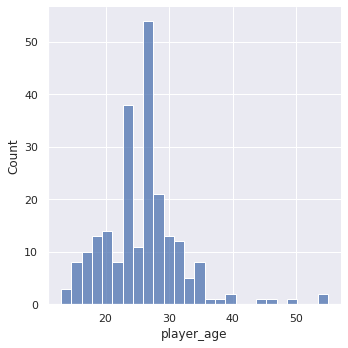

In [9]:
sns.displot(data=data, x='player_age')

### player country wise number of deaths

In [10]:
df = pd.DataFrame(data['player_country'].value_counts().loc[data['player_country'].value_counts() > 1])

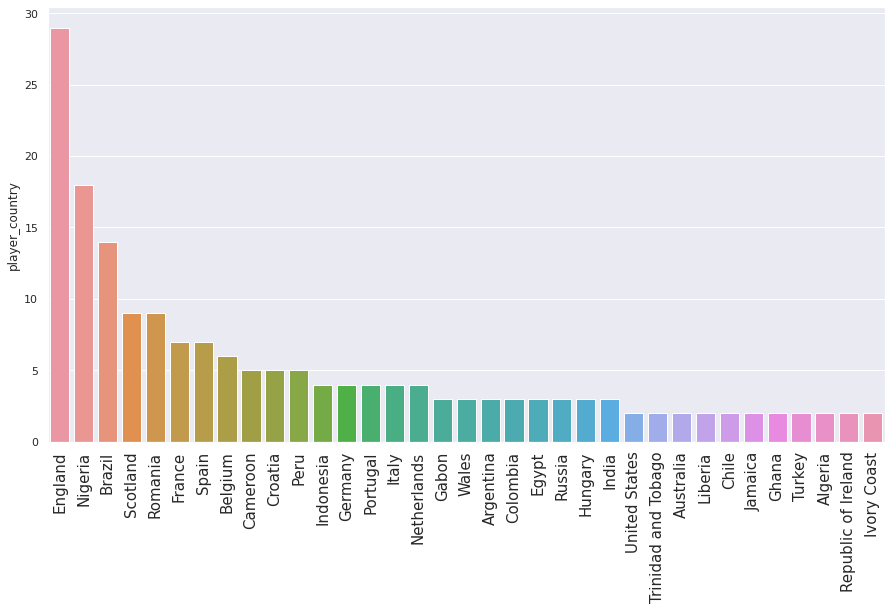

In [11]:
plt.figure(figsize=(15, 8))
ax = sns.barplot(x=df.index, y=df['player_country'])
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, fontdict={'fontsize': 15});

### team country wise number of deaths

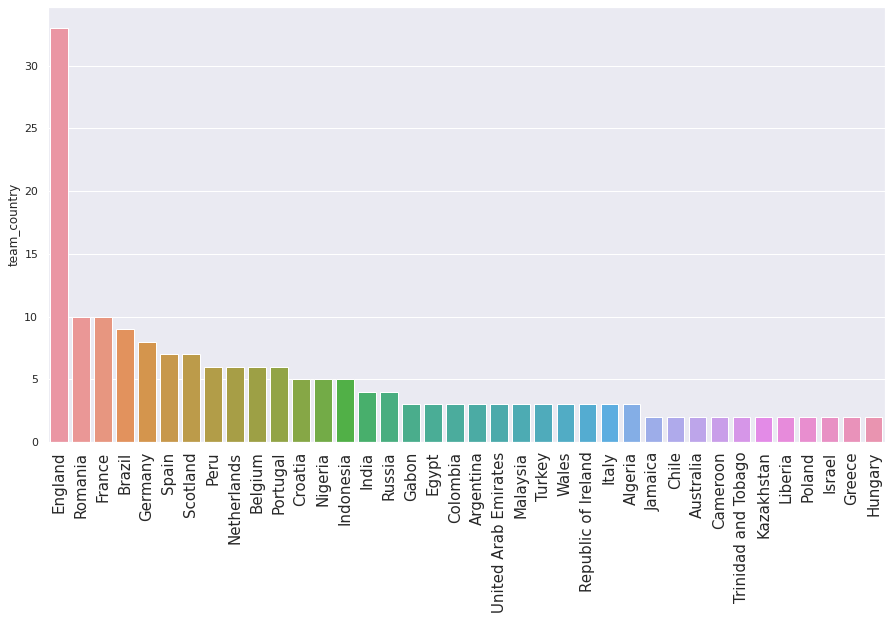

In [12]:
df = pd.DataFrame(data['team_country'].value_counts().loc[data['team_country'].value_counts() > 1])
plt.figure(figsize=(15, 8))
ax = sns.barplot(x=df.index, y=df['team_country'])
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, fontdict={'fontsize': 15});

### incident date wise number of deaths with respect to heart issues

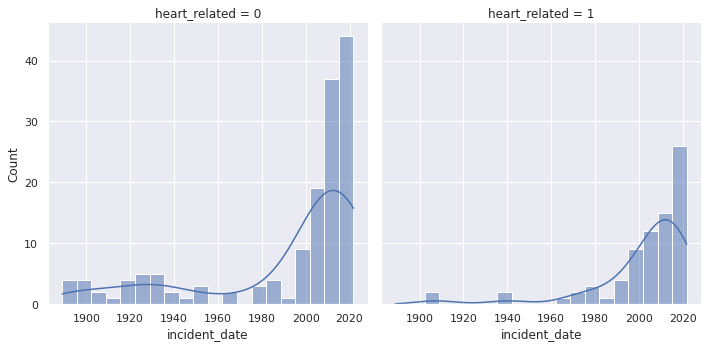

In [13]:
sns.displot(data=data, x='incident_date', kde=True, col='heart_related');

In [14]:
data['heart_related']

0      0
1      0
2      0
3      0
4      0
      ..
224    0
225    0
226    0
227    0
228    1
Name: heart_related, Length: 227, dtype: int64

### the relation between incident date and player age

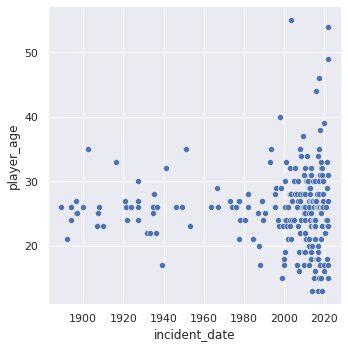

In [15]:
sns.relplot(data=data, x='incident_date', y='player_age');

In [16]:
data.head(1)

,row_id,incident_date,player_name,player_country,team_country,player_age,player_team_name,incident_description,heart_related,cardiac_related,collapsed,lightning,collision
0,1,1889-01-13,William Cropper,England,England,26.0,Staveley,Ruptured bowel in a match against Grimsby Town...,0,0,0,0,0


###  heart_related, cardiac_related, collapsed, lightning, collision wise number of deaths


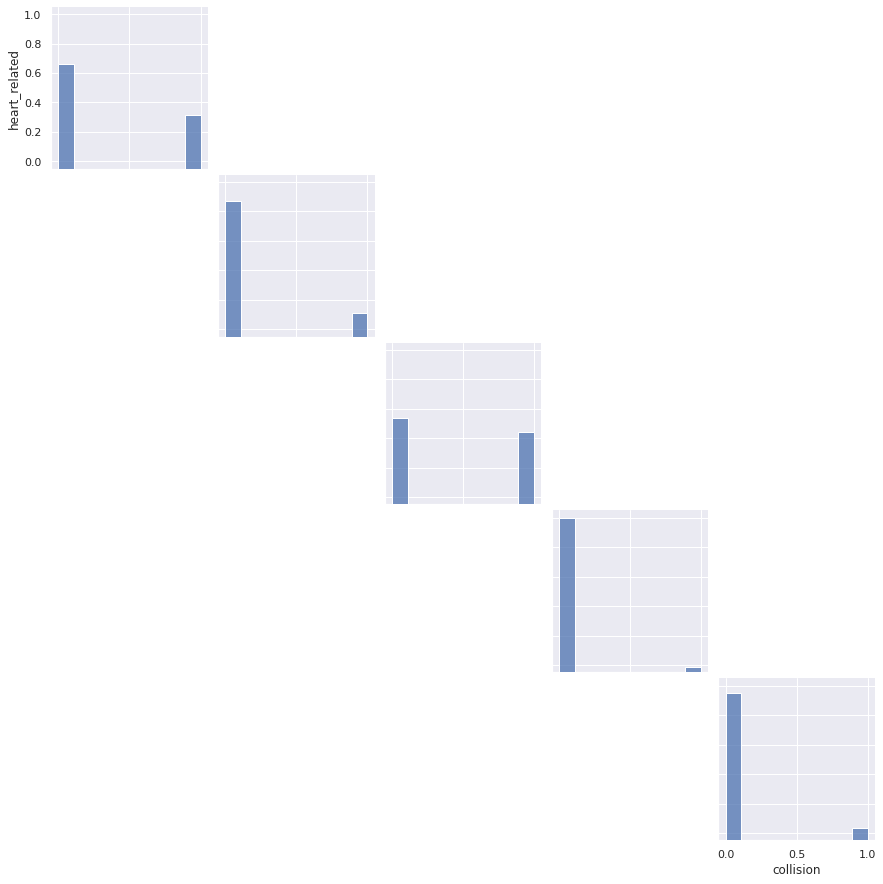

In [17]:
def hide_current_axis(*args, **kwds):
    plt.gca().set_visible(False)
    
g = sns.pairplot(data=data,
                 x_vars=['heart_related', 'cardiac_related', 'collapsed', 'lightning', 'collision'],
                 y_vars=['heart_related', 'cardiac_related', 'collapsed', 'lightning', 'collision'])
g.map_upper(hide_current_axis)
g.map_lower(hide_current_axis);

##  After these analysis it turns out that 
* the most number of deaths occurrs to the player between age 20 and 30
* the top 3 player country in number of deaths is england, nigeria and brazil
* the top 5 team country in number of deaths is england, romania, france, brazil and germany
* the most number of deaths happens between the years 2000 and 2020
* no relation between heart_related, cardiac_related, collapsed, lightning, collision and number of deaths